# NAME : Saswata Bose

### TASK 7: Stock Market Prediction using Numerical and Textual Analysis (Level - Advanced)

### Objective: Create a hybrid model for stock price/performance prediction using numerical analysis of historical stock prices, and sentimental analysis of news headlines....

### Stock to analyze and predict - SENSEX (S&P BSE SENSEX)

# Loading the Libraries

In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import matplotlib
from sklearn import datasets
import math
import os
import warnings
import plotly.offline as py
import plotly.graph_objs as go
warnings.filterwarnings('ignore')
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
# NLTK VADER for sentiment analysis
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

finwiz_url = 'https://finviz.com/quote.ashx?t='


# For versioning

# Print Versions for sharing Projects

print(f"Pandas Version : Pandas {pd.__version__}") # Pandas Version Information
print(f"Numpy Version : Numpy {np.__version__}") # Numpy Verison Information
print(f"Matplotlib Version : Matplotlib {matplotlib.__version__}") # Matplotlib Version Information
print(f"Seaborn Version : Seaborn {sns.__version__}") # Seaborn Version Information

%matplotlib inline

Pandas Version : Pandas 1.1.3
Numpy Version : Numpy 1.19.2
Matplotlib Version : Matplotlib 3.3.2
Seaborn Version : Seaborn 0.11.0


[nltk_data] Downloading package vader_lexicon to C:\Users\Saswata
[nltk_data]     Bose\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## Textual Analysis

In [2]:
news_tables = {}
tickers = ['AMZN']

for ticker in tickers:
    url = finwiz_url + ticker
    req = Request(url=url,headers={'user-agent':'my-app/0.0.1'})
    response = urlopen(req)
    # Read the contents of the file into 'html'
    html = BeautifulSoup(response)
    # Find 'news-table' in the Soup and Load it into 'news_table'
    news_table = html.find(id='news-table')
    # Add the table to our dictionary
    news_tables[ticker] = news_table

In [3]:
# Read one single day of headlines for 'AMZN'
amzn = news_tables['AMZN']
# Get all the table rows tagged in HTML with <tr> into 'amzn_tr'
amzn_tr = amzn.findAll('tr')

for i, table_row in enumerate(amzn_tr):
    # Read the text of the element 'a' into 'link_text'
    a_text = table_row.a.text
    # Read the text of the element 'td' into 'data_text'
    td_text = table_row.td.text
    # Print the contents of 'link_text' and 'data_text'
    print(a_text)
    print(td_text)
    # Exit after printing 4 rows of data
    if i == 3:
        break

United Airlines, Amazon, Intel, FuelCell Energy - 5 Things You Must Know Thursday
Jan-21-21 07:42AM  
4 Stocks to Watch as Streaming Services Continue to Explode
07:26AM  
Just how generous are Elon Musk and Jeff Bezos?
07:05AM  
Influencers with Andy Serwer: Ray McGuire
07:00AM  


In [4]:
parsed_news = []

# Iterate through the news
for file_name, news_table in news_tables.items():
    # Iterate through all tr tags in 'new_table'
    for x in news_table.findAll('tr'):
        # read the text from each tr tag into text
        # get text from a only
        text = x.a.get_text()
        # splite text in the td tag into text
        date_scrape = x.td.text.split()
        # if the length of 'date_scrape' is 1, load 'time' as the only element
        
        if len(date_scrape) == 1:
            time = date_scrape[0]
            
        # else load 'date' as the 1st element and 'time' as the second
        else:
            date = date_scrape[0]
            time = date_scrape[1]
        # Extract the ticker from the file name, get the string up to the 1st '_'
        ticker = file_name.split('_')[0]
        
        # Append ticker, date, time and headline as a list to the 'parsed_news' list
        parsed_news.append([ticker,date,time,text])
        
parsed_news

[['AMZN',
  'Jan-21-21',
  '07:42AM',
  'United Airlines, Amazon, Intel, FuelCell Energy - 5 Things You Must Know Thursday'],
 ['AMZN',
  'Jan-21-21',
  '07:26AM',
  '4 Stocks to Watch as Streaming Services Continue to Explode'],
 ['AMZN',
  'Jan-21-21',
  '07:05AM',
  'Just how generous are Elon Musk and Jeff Bezos?'],
 ['AMZN', 'Jan-21-21', '07:00AM', 'Influencers with Andy Serwer: Ray McGuire'],
 ['AMZN',
  'Jan-20-21',
  '10:27PM',
  'Amazon Offers To Help Vaccinate 100M Americans In First 100 Days Of Biden Administration'],
 ['AMZN',
  'Jan-20-21',
  '08:19PM',
  'Indian stock exchanges approve $3.4B Reliance and Future deal in setback for Amazon'],
 ['AMZN',
  'Jan-20-21',
  '07:20PM',
  'Amazon offers to help Bidens effort to quickly distribute COVID-19 vaccine'],
 ['AMZN',
  'Jan-20-21',
  '06:20PM',
  'Amazon is offering Biden a hand distributing the Covid vaccine'],
 ['AMZN',
  'Jan-20-21',
  '05:57PM',
  'How Netflixs overseas expansion fueled its explosive growth in subscri

In [5]:
# Instantiate the sentiment intensity analyzer
vader = SentimentIntensityAnalyzer()

# Set column names
columns = ['ticker','date','time','headline']

# Convert the parsed_news list into a DataFrame called 'parsed_and_scored_news'
parsed_and_scored_news = pd.DataFrame(parsed_news, columns=columns)

# Iterate through the headlines and get the polarity scores using vader
scores = parsed_and_scored_news['headline'].apply(vader.polarity_scores).tolist()

# Convert the 'scores' list of dicts into a Dataframe
scores_df = pd.DataFrame(scores)

# Join the DataFrame of the news and the list of dicts
parsed_and_scored_news = parsed_and_scored_news.join(scores_df,rsuffix='_right')

# Convert the data columns from string to datetime
parsed_and_scored_news['date'] = pd.to_datetime(parsed_and_scored_news.date).dt.date

parsed_and_scored_news

,ticker,date,time,headline,neg,neu,pos,compound
0,AMZN,2021-01-21,07:42AM,"United Airlines, Amazon, Intel, FuelCell Energ...",0.000,0.548,0.452,0.6808
1,AMZN,2021-01-21,07:26AM,4 Stocks to Watch as Streaming Services Contin...,0.000,1.000,0.000,0.0000
2,AMZN,2021-01-21,07:05AM,Just how generous are Elon Musk and Jeff Bezos?,0.000,0.708,0.292,0.5106
3,AMZN,2021-01-21,07:00AM,Influencers with Andy Serwer: Ray McGuire,0.000,1.000,0.000,0.0000
4,AMZN,2021-01-20,10:27PM,Amazon Offers To Help Vaccinate 100M Americans...,0.000,0.732,0.268,0.5267
...,...,...,...,...,...,...,...,...
95,AMZN,2021-01-14,06:22AM,Can't figure out how to end your Amazon Prime ...,0.165,0.732,0.104,-0.2500
96,AMZN,2021-01-14,06:00AM,Influencers with Andy Serwer: Haim Saban,0.000,1.000,0.000,0.0000
97,AMZN,2021-01-14,05:41AM,Amazon Faces Investigations In Connecticut Ove...,0.000,0.855,0.145,0.1779
98,AMZN,2021-01-14,04:05AM,Delivery Hero Turkey Workers Seek Precedent-Se...,0.000,0.625,0.375,0.5574


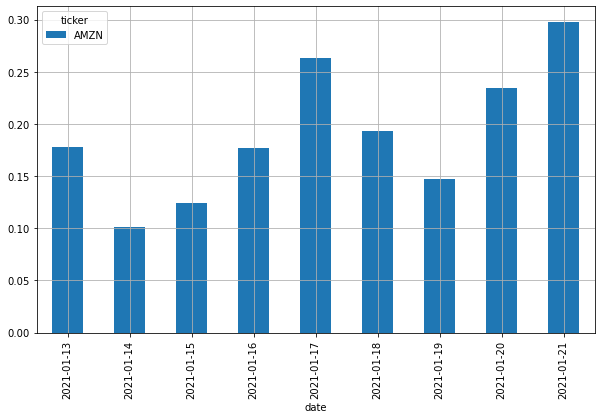

In [6]:
plt.rcParams['figure.figsize'] = [10,6]

# Group by date and ticker columns from scored_news and calculate the mean
mean_scores = parsed_and_scored_news.groupby(['ticker','date']).mean()

# Unstack the column ticker
mean_scores = mean_scores.unstack()

# Get the cross-section of compound in the 'columns' axis
mean_scores = mean_scores.xs('compound', axis = "columns").transpose()

# Plot a bar chart with pandas
mean_scores.plot(kind='bar')
plt.grid()

## Historic Stock Data Analysis

In [7]:
df_prices = pd.read_csv("AMZN (1).csv")
df_prices.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-21,1865.000000,1894.27002,1860.000000,1892.000000,1892.000000,3707800
1,2020-01-22,1896.089966,1902.50000,1883.339966,1887.459961,1887.459961,3216300
2,2020-01-23,1885.109985,1889.97998,1872.760010,1884.579956,1884.579956,2484600
3,2020-01-24,1891.369995,1894.98999,1847.439941,1861.640015,1861.640015,3766200
4,2020-01-27,1820.000000,1841.00000,1815.339966,1828.339966,1828.339966,3528500


In [8]:
df_prices.size

1771

In [9]:
# Converting Date column to datetime datatype
df_prices['Date'] = pd.to_datetime(df_prices['Date'])
df_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       253 non-null    datetime64[ns]
 1   Open       253 non-null    float64       
 2   High       253 non-null    float64       
 3   Low        253 non-null    float64       
 4   Close      253 non-null    float64       
 5   Adj Close  253 non-null    float64       
 6   Volume     253 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 14.0 KB


In [10]:
df_prices.dropna(inplace=True)

Text(0, 0.5, 'Close')

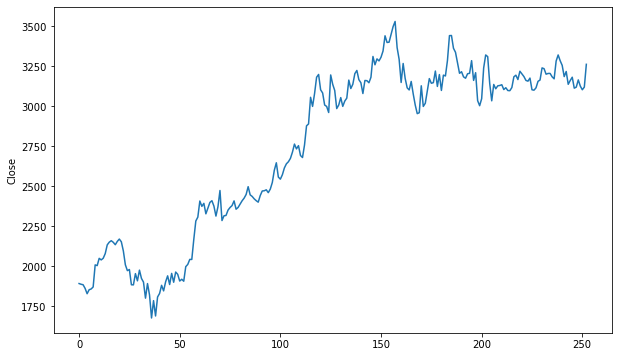

In [11]:
plt.figure(figsize=(10,6))
df_prices['Close'].plot()
plt.ylabel('Close')

Text(0.5, 1.0, 'Returns')

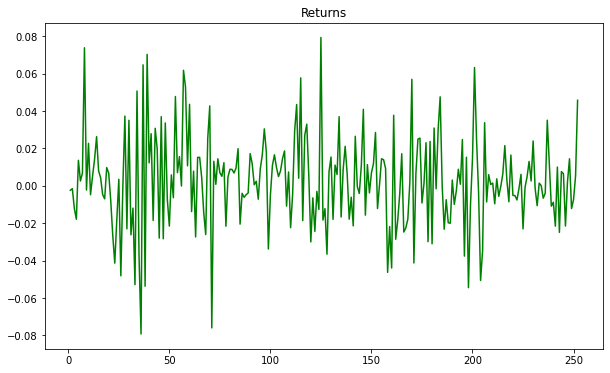

In [12]:
# Plotting Return
close = df_prices['Close']
returns = close/close.shift(1) - 1

plt.figure(figsize=(10,6))
returns.plot(label='Return',color = 'g')
plt.title("Returns")

In [13]:
parsed_and_scored_news

,ticker,date,time,headline,neg,neu,pos,compound
0,AMZN,2021-01-21,07:42AM,"United Airlines, Amazon, Intel, FuelCell Energ...",0.000,0.548,0.452,0.6808
1,AMZN,2021-01-21,07:26AM,4 Stocks to Watch as Streaming Services Contin...,0.000,1.000,0.000,0.0000
2,AMZN,2021-01-21,07:05AM,Just how generous are Elon Musk and Jeff Bezos?,0.000,0.708,0.292,0.5106
3,AMZN,2021-01-21,07:00AM,Influencers with Andy Serwer: Ray McGuire,0.000,1.000,0.000,0.0000
4,AMZN,2021-01-20,10:27PM,Amazon Offers To Help Vaccinate 100M Americans...,0.000,0.732,0.268,0.5267
...,...,...,...,...,...,...,...,...
95,AMZN,2021-01-14,06:22AM,Can't figure out how to end your Amazon Prime ...,0.165,0.732,0.104,-0.2500
96,AMZN,2021-01-14,06:00AM,Influencers with Andy Serwer: Haim Saban,0.000,1.000,0.000,0.0000
97,AMZN,2021-01-14,05:41AM,Amazon Faces Investigations In Connecticut Ove...,0.000,0.855,0.145,0.1779
98,AMZN,2021-01-14,04:05AM,Delivery Hero Turkey Workers Seek Precedent-Se...,0.000,0.625,0.375,0.5574


In [14]:
df_prices

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-21,1865.000000,1894.270020,1860.000000,1892.000000,1892.000000,3707800
1,2020-01-22,1896.089966,1902.500000,1883.339966,1887.459961,1887.459961,3216300
2,2020-01-23,1885.109985,1889.979980,1872.760010,1884.579956,1884.579956,2484600
3,2020-01-24,1891.369995,1894.989990,1847.439941,1861.640015,1861.640015,3766200
4,2020-01-27,1820.000000,1841.000000,1815.339966,1828.339966,1828.339966,3528500
...,...,...,...,...,...,...,...
248,2021-01-13,3128.439941,3189.949951,3122.080078,3165.889893,3165.889893,3321200
249,2021-01-14,3167.520020,3178.000000,3120.590088,3127.469971,3127.469971,3070900
250,2021-01-15,3123.020020,3142.550049,3095.169922,3104.250000,3104.250000,4244000
251,2021-01-19,3107.000000,3145.000000,3096.000000,3120.760010,3120.760010,3305100


In [15]:
df_news = parsed_and_scored_news.rename(columns={'date':'Date'})

In [16]:
df_news

,ticker,Date,time,headline,neg,neu,pos,compound
0,AMZN,2021-01-21,07:42AM,"United Airlines, Amazon, Intel, FuelCell Energ...",0.000,0.548,0.452,0.6808
1,AMZN,2021-01-21,07:26AM,4 Stocks to Watch as Streaming Services Contin...,0.000,1.000,0.000,0.0000
2,AMZN,2021-01-21,07:05AM,Just how generous are Elon Musk and Jeff Bezos?,0.000,0.708,0.292,0.5106
3,AMZN,2021-01-21,07:00AM,Influencers with Andy Serwer: Ray McGuire,0.000,1.000,0.000,0.0000
4,AMZN,2021-01-20,10:27PM,Amazon Offers To Help Vaccinate 100M Americans...,0.000,0.732,0.268,0.5267
...,...,...,...,...,...,...,...,...
95,AMZN,2021-01-14,06:22AM,Can't figure out how to end your Amazon Prime ...,0.165,0.732,0.104,-0.2500
96,AMZN,2021-01-14,06:00AM,Influencers with Andy Serwer: Haim Saban,0.000,1.000,0.000,0.0000
97,AMZN,2021-01-14,05:41AM,Amazon Faces Investigations In Connecticut Ove...,0.000,0.855,0.145,0.1779
98,AMZN,2021-01-14,04:05AM,Delivery Hero Turkey Workers Seek Precedent-Se...,0.000,0.625,0.375,0.5574


In [17]:
df_news['Date'] = pd.to_datetime(df_news['Date'],utc=True)
df_prices['Date'] = pd.to_datetime(df_prices['Date'],utc=True)

In [18]:
df_merge = pd.merge(df_prices,df_news,how='inner',on='Date')
df_merge

,Date,Open,High,Low,Close,Adj Close,Volume,ticker,time,headline,neg,neu,pos,compound
0,2021-01-13 00:00:00+00:00,3128.439941,3189.949951,3122.080078,3165.889893,3165.889893,3321200,AMZN,10:59PM,An Overview of Businesses Owned by Amazon,0.000,0.779,0.221,0.1779
1,2021-01-14 00:00:00+00:00,3167.520020,3178.000000,3120.590088,3127.469971,3127.469971,3070900,AMZN,09:08PM,Amazon faces class-action lawsuit over eBook p...,0.221,0.581,0.198,-0.0516
2,2021-01-14 00:00:00+00:00,3167.520020,3178.000000,3120.590088,3127.469971,3127.469971,3070900,AMZN,05:48PM,Dow Jones Futures: $1.9 Trillion Biden Stimulu...,0.000,1.000,0.000,0.0000
3,2021-01-14 00:00:00+00:00,3167.520020,3178.000000,3120.590088,3127.469971,3127.469971,3070900,AMZN,05:01PM,The Stock Market Had a Better Day Than it Seem...,0.000,0.649,0.351,0.6597
4,2021-01-14 00:00:00+00:00,3167.520020,3178.000000,3120.590088,3127.469971,3127.469971,3070900,AMZN,04:31PM,"Virgin Galactic Rival Blue Origin Gets 'Very, ...",0.000,1.000,0.000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,2021-01-20 00:00:00+00:00,3181.989990,3279.800049,3175.000000,3263.379883,3263.379883,5299400,AMZN,09:19AM,P&G raises full-fiscal year sales and profit o...,0.000,0.659,0.341,0.7351
80,2021-01-20 00:00:00+00:00,3181.989990,3279.800049,3175.000000,3263.379883,3263.379883,5299400,AMZN,08:47AM,Kohl's (KSS) Up More Than 95% in Three Months:...,0.000,1.000,0.000,0.0000
81,2021-01-20 00:00:00+00:00,3181.989990,3279.800049,3175.000000,3263.379883,3263.379883,5299400,AMZN,07:15AM,Is Amazon Stock A Buy Right Now? Here's What E...,0.000,0.855,0.145,0.1779
82,2021-01-20 00:00:00+00:00,3181.989990,3279.800049,3175.000000,3263.379883,3263.379883,5299400,AMZN,07:12AM,20 Realistic Tech Predictions for 2021 (Part Two),0.000,1.000,0.000,0.0000


In [19]:
df = df_merge[['Close','compound','neg','neu','pos']]
df

,Close,compound,neg,neu,pos
0,3165.889893,0.1779,0.000,0.779,0.221
1,3127.469971,-0.0516,0.221,0.581,0.198
2,3127.469971,0.0000,0.000,1.000,0.000
3,3127.469971,0.6597,0.000,0.649,0.351
4,3127.469971,0.0000,0.000,1.000,0.000
...,...,...,...,...,...
79,3263.379883,0.7351,0.000,0.659,0.341
80,3263.379883,0.0000,0.000,1.000,0.000
81,3263.379883,0.1779,0.000,0.855,0.145
82,3263.379883,0.0000,0.000,1.000,0.000


In [20]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
new_df = pd.DataFrame(sc.fit_transform(df))
new_df.columns = df.columns
new_df.index = df.index
new_df.head()

,Close,compound,neg,neu,pos
0,0.387356,0.549524,0.00,0.498866,0.501134
1,0.145918,0.392429,0.85,0.049887,0.448980
2,0.145918,0.427750,0.00,1.000000,0.000000
3,0.145918,0.879321,0.00,0.204082,0.795918
4,0.145918,0.427750,0.00,1.000000,0.000000


In [21]:
X = new_df.drop('Close',axis=1)
y = new_df['Close']

In [22]:
X.head()

,compound,neg,neu,pos
0,0.549524,0.00,0.498866,0.501134
1,0.392429,0.85,0.049887,0.448980
2,0.427750,0.00,1.000000,0.000000
3,0.879321,0.00,0.204082,0.795918
4,0.427750,0.00,1.000000,0.000000


In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
X_train.shape

(67, 4)

In [24]:
X_train[:10]

,compound,neg,neu,pos
73,0.777261,0.000000,0.206349,0.793651
48,0.427750,0.000000,1.000000,0.000000
74,0.716271,0.000000,0.326531,0.673469
83,0.166404,0.861538,0.492063,0.000000
61,0.549524,0.000000,0.696145,0.303855
41,0.427750,0.000000,1.000000,0.000000
63,0.549524,0.000000,0.718821,0.281179
55,0.427750,0.000000,1.000000,0.000000
45,0.427750,0.000000,1.000000,0.000000
72,0.788281,0.000000,0.040816,0.959184


## Model Training and Accuracy

In [25]:
import lightgbm
lgb = lightgbm.LGBMRegressor()
lgb.fit(X_train,y_train)

LGBMRegressor()

In [26]:
from sklearn.metrics import mean_squared_error
predictions = lgb.predict(X_test)
print(mean_squared_error(predictions,y_test))

0.17342746903025344
